## Seed Dataset Using KNN
Implement the explored KNN classification mechanism, along with the data visualization techniques discussed on the datasets.


In [15]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore') 

In [16]:
df = pd.read_csv('Data_sets/seeds.csv')
df.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [17]:
# Class distribution
print(df.Type.value_counts())


print("1 → Kama wheat")
print("2 → Rosa wheat")
print("3 → Canadian wheat")


Type
2    68
1    66
3    65
Name: count, dtype: int64
1 → Kama wheat
2 → Rosa wheat
3 → Canadian wheat


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             199 non-null    float64
 1   Perimeter        199 non-null    float64
 2   Compactness      199 non-null    float64
 3   Kernel.Length    199 non-null    float64
 4   Kernel.Width     199 non-null    float64
 5   Asymmetry.Coeff  199 non-null    float64
 6   Kernel.Groove    199 non-null    float64
 7   Type             199 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 12.6 KB


In [19]:
df.describe()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,14.918744,14.595829,0.870811,5.643151,3.265533,3.699217,5.420653,1.994975
std,2.919976,1.310445,0.023320,0.443593,0.378322,1.471102,0.492718,0.813382
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.330000,13.470000,0.857100,5.267000,2.954500,2.570000,5.046000,1.000000
50%,14.430000,14.370000,0.873400,5.541000,3.245000,3.631000,5.228000,2.000000
75%,17.455000,15.805000,0.886800,6.002000,3.564500,4.799000,5.879000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.315000,6.550000,3.000000


In [20]:
df.isnull().sum()

Area               0
Perimeter          0
Compactness        0
Kernel.Length      0
Kernel.Width       0
Asymmetry.Coeff    0
Kernel.Groove      0
Type               0
dtype: int64

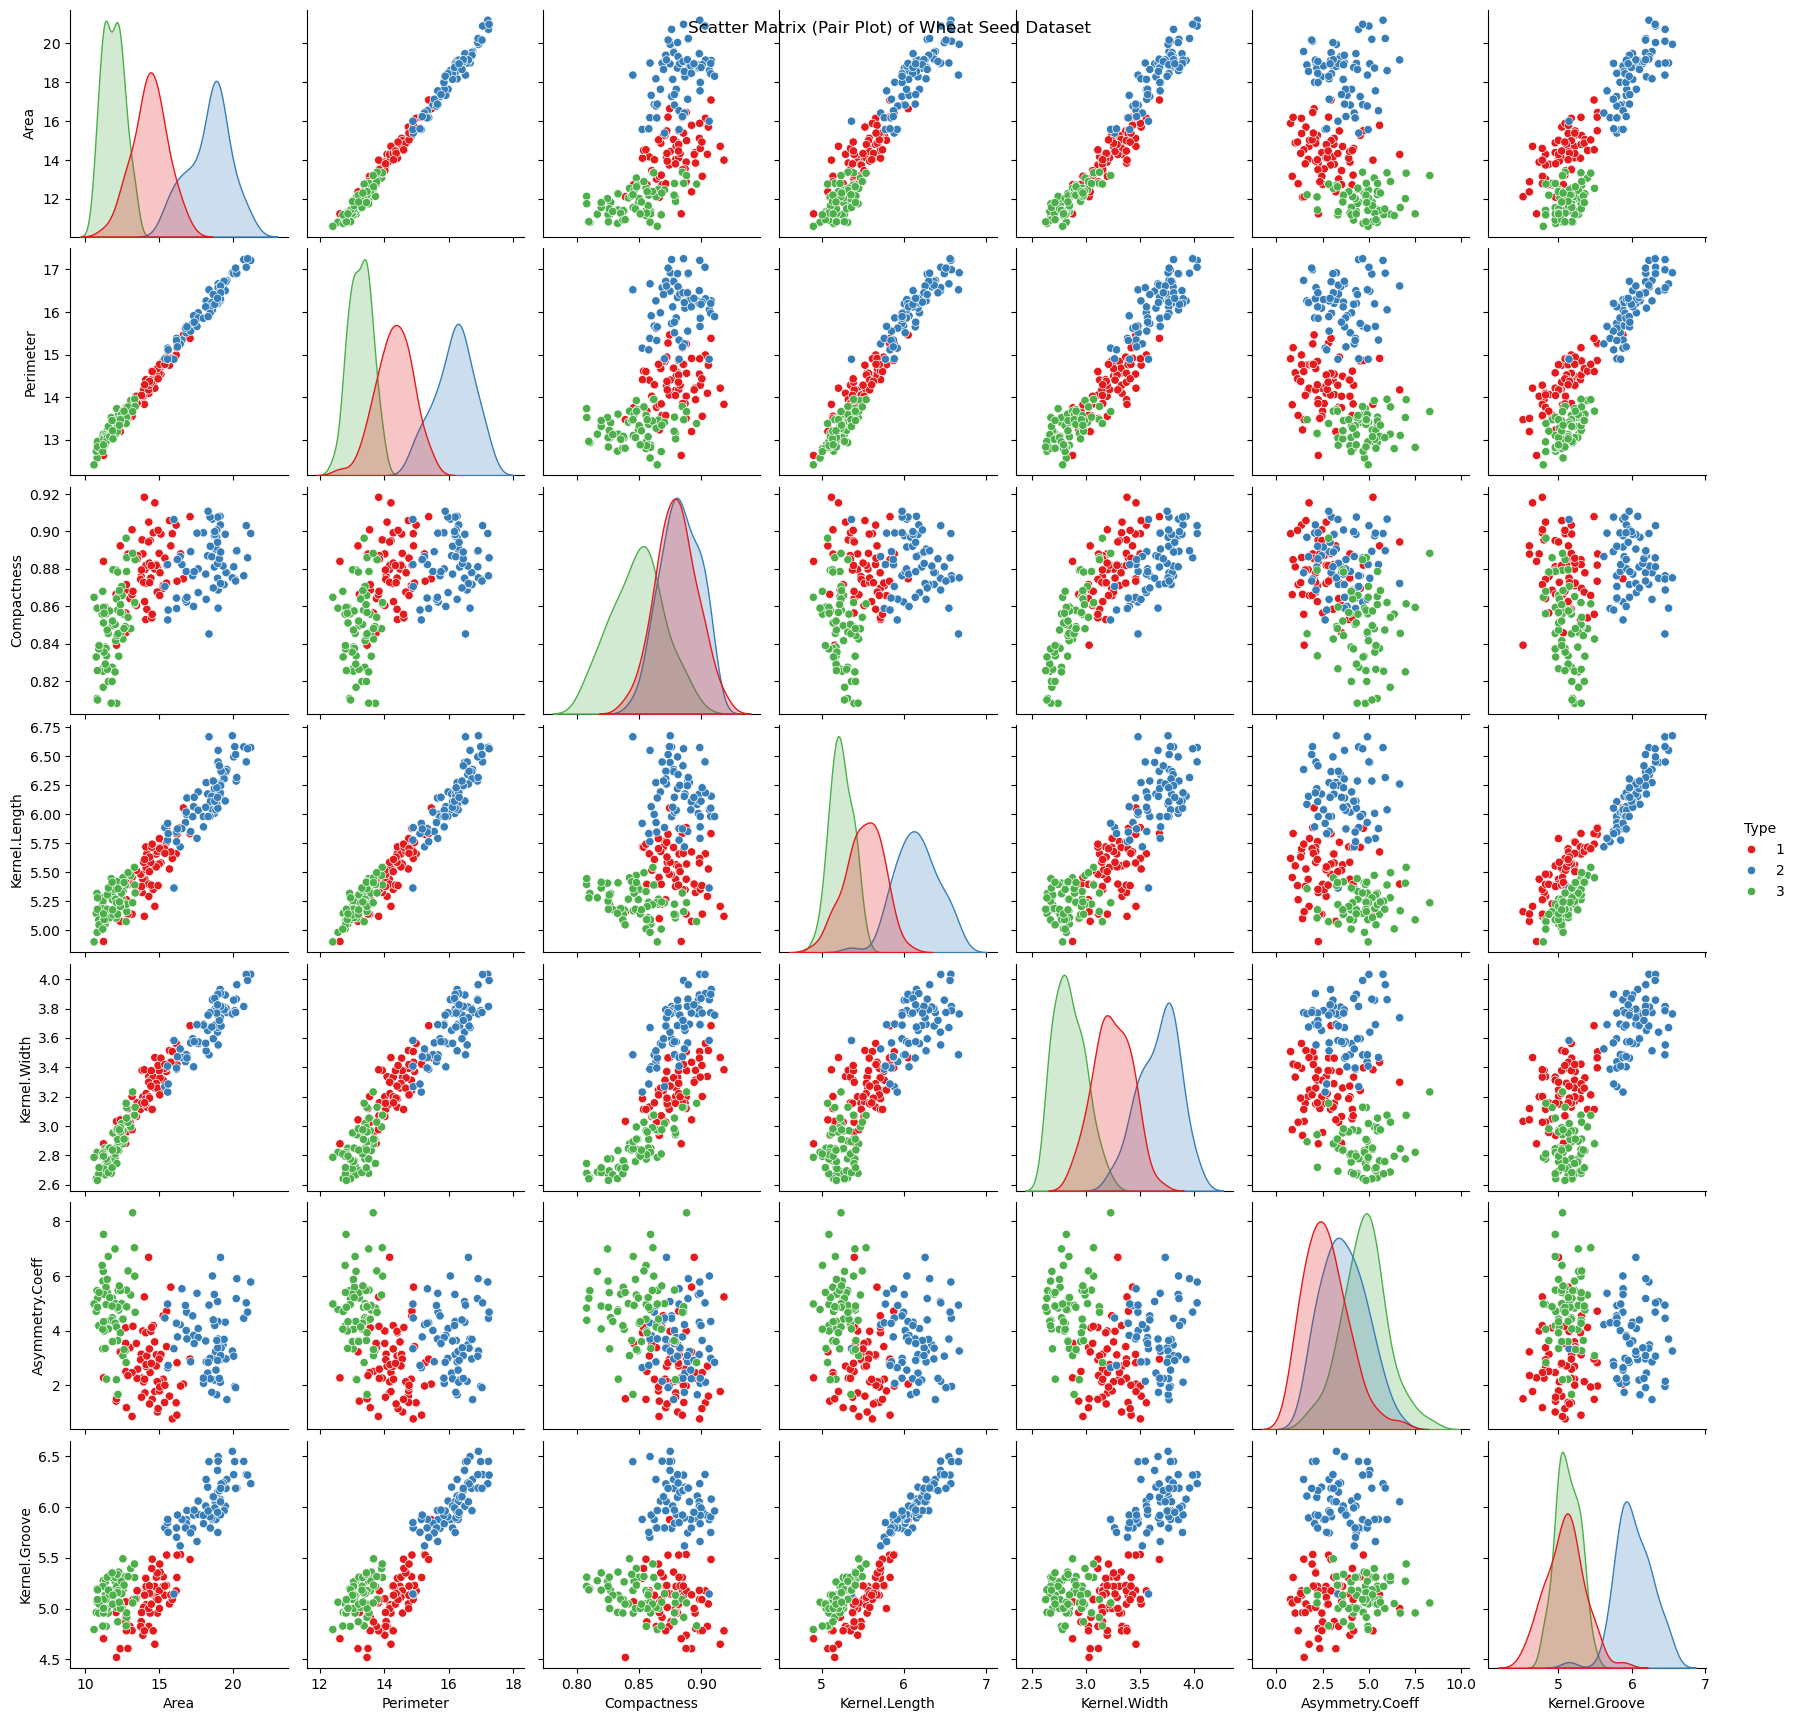

In [21]:
sns.pairplot(
    df,
    vars=['Area','Perimeter','Compactness','Kernel.Length','Kernel.Width','Asymmetry.Coeff','Kernel.Groove'],
    hue='Type',
    palette='Set1'
)
plt.suptitle('Scatter Matrix (Pair Plot) of Wheat Seed Dataset')
plt.show()

In [22]:
X = df[['Area','Perimeter','Compactness','Kernel.Length','Kernel.Width','Asymmetry.Coeff','Kernel.Groove']]
y = df[['Type']]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [26]:
y_pred = knn.predict(X_test)

In [27]:
print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))



✅ Accuracy: 0.95


In [28]:
sample = np.array([[15.26, 14.84, 0.871, 5.763, 3.312, 2.221, 5.22]])  
# [area, perimeter, compactness, length, width, asymmetry, groove]

sample_scaled = scaler.transform(sample.reshape(1,-1))
predicted_class = knn.predict(sample_scaled)

print("\n Predicted Seed Variety:", predicted_class[0])


 Predicted Seed Variety: 1
